### Muhammad Hazim Al Farouq
### 1906400103

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import io, color
import os

# No 1

### a. [20] Buatlah method predict yang menerima parameter nama_file dan mengembalikan output “ruby” untuk citra yang tergolong sebagai ruby dan “emerald” untuk citra yang tergolong sebagai emerald. Method predict yang dibuat wajib menggunakan fitur berupa image histogram. Pengecekan dan ekstraksi fitur yang dilakukan pada setiap citra harus di automasi, tidak boleh di-hardcode untuk tiap citra.

In [2]:
def predict(file_name):
    img = io.imread(file_name)
    R = np.mean(img[:,:,0].flatten())
    G = np.mean(img[:,:,1].flatten())
    
    if R > G:
        print(f"image {file_name} is predicted Ruby")
    else:
        print(f"image {file_name} is predicted Emerald")
    

In [3]:
files_ruby = os.path.dirname("Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/ruby/")
files_emerald = os.path.dirname("Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/emerald/")

lst_path = [files_ruby, files_emerald]
for path in lst_path:
    for file in os.listdir(path):

        if file.split(".")[1] == "jpg":
            predict(os.path.join(path,file))


image Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/ruby\ruby1.jpg is predicted Ruby
image Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/ruby\ruby2.jpg is predicted Ruby
image Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/ruby\ruby3.jpg is predicted Ruby
image Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/ruby\ruby4.jpg is predicted Ruby
image Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/emerald\emerald1.jpg is predicted Emerald
image Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/emerald\emerald2.jpg is predicted Emerald
image Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/emerald\emerald3.jpg is predicted Emerald
image Citra Tugas Lab 6/Citra Tugas Lab 6/Histogram/emerald\emerald4.jpg is predicted Emerald


### b. [10] Jelaskan fitur yang telah Anda buat pada bagian a dan alasan Anda memilih fitur tersebut.


Saya memilih membuat fitur perbandingan antara R dan G karena, gambar ruby pasti memiliki frekuensi R yang lebih besar ketimbang emerald dan gambar emerald pasti memiliki frekuensi G yang lebih tinggi ketimbang ruby.

# 2. [30] Hough Transform

### a. [20] Gunakan hasil hough transformation yang telah didapatkan sebagai fitur untuk mengklasifikasikan apakah citra tersebut merupakan triangle atau square.


1.5707964
0.0
0.0
1.5707964
0.0
1.5707964
1.5707964
0.0


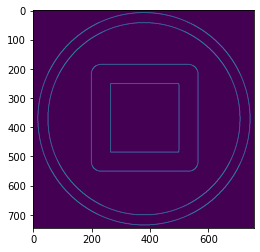

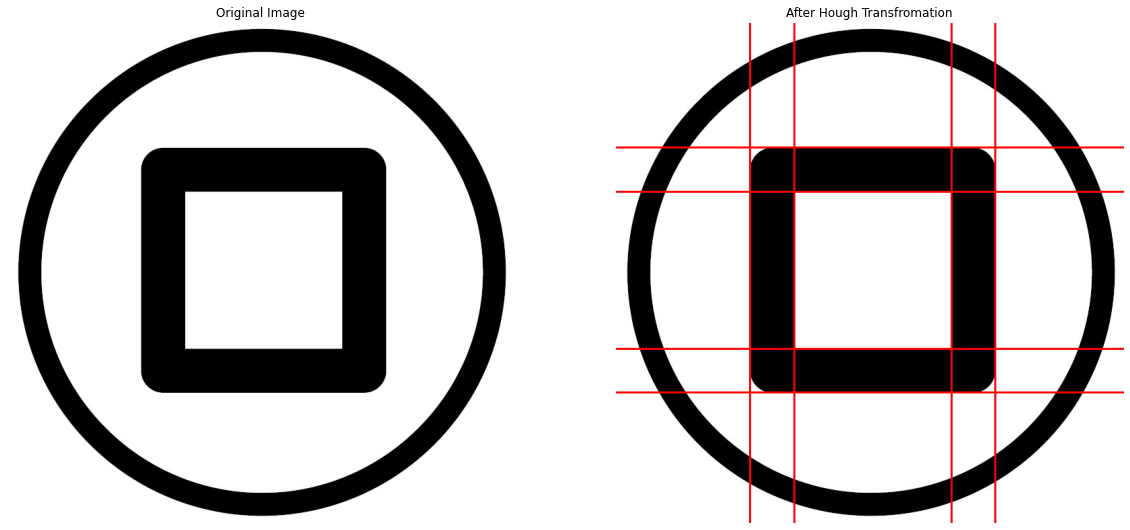

In [4]:
img = io.imread("Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/square/square3.jpg")
original_image = np.copy(img)


gray =  (color.rgb2gray(img) * 255).astype(np.uint8)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)

plt.imshow(edges)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 2)
        print(theta)
# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Hough Transfromation')
plt.imshow(img,)
plt.axis('off')
plt.show()




In [5]:
def predict_hough(file_img):
    img = io.imread(file_img)

    gray =  (color.rgb2gray(img) * 255).astype(np.uint8)

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    result = []
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 2)
        if theta > 0:
            result.append(theta)
    count = 0
    for res in result:
        if res > 1.5707964:
            count += 1
            
    if count > 0:
        return f'file {file_img} is predicted triangle'
    else:
        return f'file {file_img} is predicted square'

    


In [6]:
files_triangle = os.path.dirname("Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/triangle/triangle1.jpg")
files_square = os.path.dirname("Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/square/square1.jpg")

lst_path = [files_triangle, files_square]
for path in lst_path:
    for file in os.listdir(path):

        if file.split(".")[1] == "jpg":
            print(predict_hough(os.path.join(path,file)))

file Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/triangle\triangle1.jpg is predicted triangle
file Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/triangle\triangle2.jpg is predicted triangle
file Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/triangle\triangle3.jpg is predicted triangle
file Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/triangle\triangle4.jpg is predicted triangle
file Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/square\square1.jpg is predicted square
file Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/square\square2.jpg is predicted square
file Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/square\square3.jpg is predicted square
file Citra Tugas Lab 6/Citra Tugas Lab 6/Hough/square\square4.jpg is predicted square


### b. [10] Jelaskan fitur yang telah Anda buat pada bagian a dan alasan Anda memilih fitur tersebut.


disini saya membuat fitur untuk menghitung sudut dari gambar, apabila terdapat sudut lebih besar 1.5708 radian (atau setara dengan 90 derajat) maka dapat diprediksi bahwa gambar tersebut adalah segitiga. Sebaliknya, jika tidak terdapat sudut yang lebih besar dari 1.5708 maka gambar tersebut dapat diprediksi square. Saya memilih fitur ini karena setelah mengamati nilai theta dari gambar square,  nilai maksimal dari sudut tersebut pasti 1.5708. Kemudian, untuk nilai theta pada gambar triangle, pasti terdapat nilai theta yang lebih dari 1.5708.

# No 3 Template Matching

### a. [15] Lakukan dan tampilkan hasil template matching dengan berbagai threshold pada kedua gambar! Anda bisa menggunakan library OpenCV/Skimage/lainnya.


In [7]:
def predict_matching(file_template, file_img):
    # Membaca citra input
    img = cv2.cvtColor(cv2.imread(file_img),
    cv2.COLOR_BGR2RGB)
    template_img = cv2.cvtColor(cv2.imread(file_template),
    cv2.COLOR_BGR2RGB)
    # Mengubah citra input menjadi grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    template_gray = cv2.cvtColor(template_img,
    cv2.COLOR_RGB2GRAY)


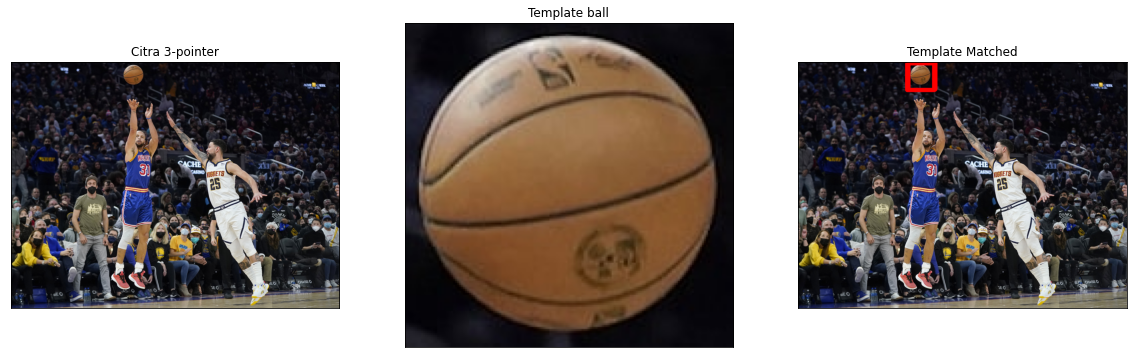

In [8]:
# Membaca citra input
img = cv2.cvtColor(cv2.imread('Citra Tugas Lab 6/Citra Tugas Lab 6/Template Matching/3-pointer.jpg'),
cv2.COLOR_BGR2RGB)
template_img = cv2.cvtColor(cv2.imread('Citra Tugas Lab 6/Citra Tugas Lab 6/Template Matching/ball.jpg'),
cv2.COLOR_BGR2RGB)

# Mengubah citra input menjadi grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
template_gray = cv2.cvtColor(template_img, cv2.COLOR_RGB2GRAY)

# Menyimpan width dan height template
w, h = template_gray.shape[::-1]

# Proses template matching
res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)
# Mencatat koordinat hasil template matching
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# Copy citra asli untuk ditandai bounding box
template_matched = img.copy()
# Menentukan threshold
threshold = 0.6
loc = np.where( res >= threshold)
# Membuat bounding box dengan rectangle
# Rectangle memiliki 4 parameter yaitu (image, start_point, end_point, color, thickness)
for point in zip(*loc[::-1]):
    cv2.rectangle(template_matched, point, (point[0] + w, point[1]+ h), (255,0,0), 2)
# Menampilkan citra
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img)
plt.title('Citra 3-pointer'), plt.xticks([]),
plt.yticks([])
plt.subplot(132),plt.imshow(template_img)
plt.title('Template ball'), plt.xticks([]),
plt.yticks([])
plt.subplot(133),plt.imshow(template_matched)
plt.title('Template Matched'),
plt.xticks([]),plt.yticks([])
plt.show()



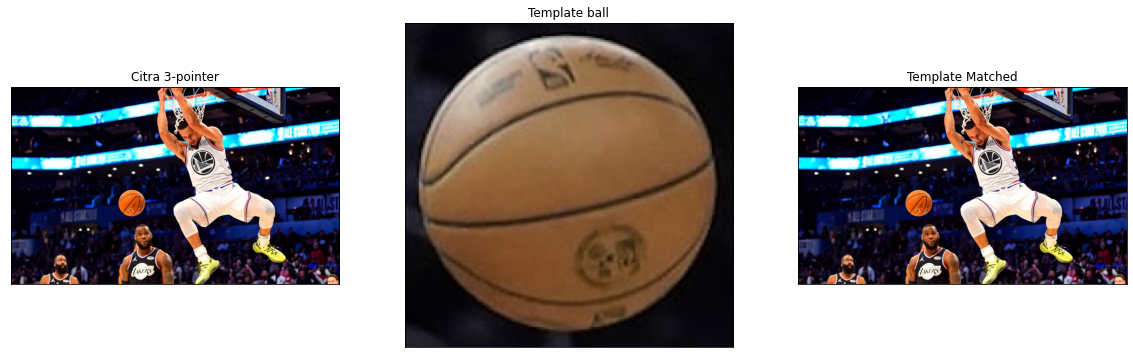

In [9]:
# Membaca citra input
img = cv2.cvtColor(cv2.imread('Citra Tugas Lab 6/Citra Tugas Lab 6/Template Matching/dunk.jpg'),
cv2.COLOR_BGR2RGB)
template_img = cv2.cvtColor(cv2.imread('Citra Tugas Lab 6/Citra Tugas Lab 6/Template Matching/ball.jpg'),
cv2.COLOR_BGR2RGB)

# Mengubah citra input menjadi grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
template_gray = cv2.cvtColor(template_img, cv2.COLOR_RGB2GRAY)

# Menyimpan width dan height template
w, h = template_gray.shape[::-1]

# Proses template matching
res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)
# Mencatat koordinat hasil template matching
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# Copy citra asli untuk ditandai bounding box
template_matched = img.copy()
# Menentukan threshold
threshold = 0.7
loc = np.where( res >= threshold)
# Membuat bounding box dengan rectangle
# Rectangle memiliki 4 parameter yaitu (image, start_point, end_point, color, thickness)
for point in zip(*loc[::-1]):
    cv2.rectangle(template_matched, point, (point[0] + w, point[1]+ h), (255,0,0), 2)
# Menampilkan citra
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img)
plt.title('Citra 3-pointer'), plt.xticks([]),
plt.yticks([])
plt.subplot(132),plt.imshow(template_img)
plt.title('Template ball'), plt.xticks([]),
plt.yticks([])
plt.subplot(133),plt.imshow(template_matched)
plt.title('Template Matched'),
plt.xticks([]),plt.yticks([])
plt.show()



### b. [15] Berdasarkan eksplorasi di poin a, perbedaan apa yang Anda temukan? Mengapa perbedaan ini terjadi?

Semakin besar threshold, maka akan semakin sedikit atau bahkan tidak ada objek yang match dengan template. Semakin kecil threshold, maka akan semakin banyak objek yang match dengan template. Hal ini bisa terjadi karena kita akan membuat bounding box jika result >= threshold, jika threshold yang kita miliki sangat kecil, maka akan banyak object yang match dengan template. Sebaliknya, jika nilai threshold terlalu besar, maka bisa saja nilai threshold tersebut melebihi nilai result akibatnya tidak ada object yang match dengan template yang kita miliki.

### c. [10] Menurut Anda, apakah kelebihan dan kekurangan metode fitur ekstraksi ini? Apakah untuk kasus template matching untuk bola pada gambar pertandingan basket cocok?


Kelebihan metode fitur ekstraksi ini adalah implementasinya mudah, dan kita tidak memerlukan resource yang besar untuk melakukan feature extraction, seperti memerlukan GPU jika fitur ekstraksi menggunakan deep learning. Kekurangan fitur ekstraksi ini adalah gambar template yang digunakan harus kurang lebih sama persis dengan object pada gambar yang akan di match. Jika berbeda sedikit, maka fitur yang diinginkan bisa tidak terekstrak. Selain itu, nilai threshold untuk setiap gambar perlu kita atur secara manual, sehingga agak merepotkan jika kita ingin mengekstrak fitur tertentu dari banyak gambar.

Untuk template matching dengan gambar pertandingan basket pertama cocok, namun dengan gambar pertandingan basket yang kedua tidak cocok. Bisa dilihat dengan nilai threshold yang sama pada gambar pertandingan basket yang kedua fitur bola basket tidak dapat di ekstrak